In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [4]:
from freq_pd import proc_freq

In [5]:
prod_clusters = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\product_clusters.csv',dtype={'Item_Number':str}, index_col=0)

In [6]:
pdtypes = {'Item Number':str,'Vendor':str}

In [7]:
# products_iowa = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\Iowa_Liquor_Products(1).csv',dtype=pdtypes)

In [8]:
# products_iowa.rename({'Item Description':'Item_Description'} ,axis=1, inplace=True)

In [9]:
# products_iowa.info()

In [10]:
# products_iowa.head()

In [11]:
# products_iowa.drop(columns=['UPC','SCC',])

In [12]:
# proc_freq(products_iowa,'Age') 96% have age zero

In [13]:
# item_trans_category = item_trans_category.merge(products, how='inner', on=['Item_Number','Category'])

In [14]:
# prod_clusters_iowa = prod_clusters.merge(products_iowa, how='inner',on=['Item Description'])

In [15]:
prod_clusters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4464 entries, 1 to 4470
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Category            4464 non-null   int64  
 1   New_Category_Name   4464 non-null   object 
 2   Item_Number         4464 non-null   object 
 3   Item_Description    4464 non-null   object 
 4   Bottle_Volume       4464 non-null   int64  
 5   Bottle_Retail       4464 non-null   float64
 6   Bottles_Sold        4464 non-null   int64  
 7   cluster_name        4464 non-null   object 
 8   revenue             4464 non-null   float64
 9   Num_Stores_Selling  4464 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 383.6+ KB


In [16]:
prod_clusters.describe()

,Category,Bottle_Volume,Bottle_Retail,Bottles_Sold,revenue,Num_Stores_Selling
count,4.464000e+03,4464.000000,4464.000000,4464.000000,4.464000e+03,4464.000000
mean,1.136631e+06,790.209005,30.117323,6475.495296,9.606956e+04,125.280914
std,2.541399e+05,399.728629,41.034842,24393.595460,3.939312e+05,214.128669
min,1.011000e+06,20.000000,0.990000,1.000000,7.500000e+00,1.000000
25%,1.012300e+06,750.000000,11.810000,53.000000,1.402020e+03,3.000000
50%,1.032200e+06,750.000000,20.250000,550.000000,1.312312e+04,49.000000
75%,1.081300e+06,750.000000,35.120000,3631.000000,5.382562e+04,155.000000
max,1.901200e+06,2400.000000,1012.500000,563260.000000,1.062280e+07,1725.000000


In [17]:

everything_else = prod_clusters.loc[prod_clusters['cluster_name']=='Everything_Else',:]

In [18]:
everything_else.head(10)

,Category,New_Category_Name,Item_Number,Item_Description,Bottle_Volume,Bottle_Retail,Bottles_Sold,cluster_name,revenue,Num_Stores_Selling
1,1012200,Scotch,10006,Scoresby Rare Scotch,750,7.70,4619,Everything_Else,35566.30,197
2,1701100,Temporary & Specialty Packages,100077,Kraken Rum w/ Tiki Glass,750,15.68,2679,Everything_Else,42006.72,136
4,1012200,Scotch,10009,Scoresby Rare Scotch,1000,10.11,1722,Everything_Else,17409.42,70
5,1701100,Temporary & Specialty Packages,100148,Jack Daniels Single Barrel w/Snifter Glass,750,41.39,606,Everything_Else,25082.34,120
6,1701100,Temporary & Specialty Packages,100202,Baileys Original Irish Cream w/2 Dessert Bowls,750,24.74,3160,Everything_Else,78178.40,149
7,1700000,Temporary & Specialty Packages,100210,Clyde Mays Dualpack,750,30.00,66,Everything_Else,1980.00,1
8,1701100,Temporary & Specialty Packages,100215,Tequila Rose Liqueur w/2 Shot Glasses,750,17.25,1191,Everything_Else,20544.75,161
9,1701100,Temporary & Specialty Packages,100216,Tarantula Azul Holiday w/2 Shot Glasses,750,13.49,133,Everything_Else,1794.17,24
10,1701100,Temporary & Specialty Packages,100248,Martell Blue Swift w/ 2 Glasses,750,31.47,47,Everything_Else,1479.09,8
11,1071100,Cocktails,100280,The Bitter Truth Cocktail Bar Pack,20,14.25,180,Everything_Else,2565.00,38


In [19]:
scaler = StandardScaler()

In [20]:
everything_else[['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled' ]] = scaler.fit_transform\
                                           (everything_else[['Bottle_Volume', 'Bottle_Retail', 'Bottles_Sold']])
                                                   

everything_else[['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled']].describe()

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,Bottle_Volume_scaled,Bottle_Retail_scaled,Bottles_Sold_scaled
count,3.882000e+03,3.882000e+03,3.882000e+03
mean,-1.703486e-15,3.785397e-16,-2.719074e-16
std,1.000129e+00,1.000129e+00,1.000129e+00
min,-2.719456e+00,-1.206657e+00,-3.877879e-01
25%,2.948001e-01,-7.219158e-01,-3.835166e-01
50%,2.948001e-01,-2.952872e-01,-3.453930e-01
75%,2.948001e-01,3.885943e-01,-9.343205e-02
max,2.152903e+00,4.852604e+00,8.474059e+00


determine optimal number of clusters

In [21]:
from sklearn.metrics import silhouette_score

cluster_cols = ['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled' ]

df_scaled = everything_else[cluster_cols]


for clust in range(2,11):
    model = KMeans(n_clusters=clust, random_state=42).fit(df_scaled)
    

    
    silhouette_avg = silhouette_score(df_scaled,model.labels_)
    print('number of clusters = ',clust,' ','silhouette score = ',silhouette_avg)

number of clusters =  2   silhouette score =  0.5560706659150982
number of clusters =  3   silhouette score =  0.5648823220214009
number of clusters =  4   silhouette score =  0.5413721085078343
number of clusters =  5   silhouette score =  0.44572014033196417
number of clusters =  6   silhouette score =  0.4581252353423698
number of clusters =  7   silhouette score =  0.46653063493914165
number of clusters =  8   silhouette score =  0.4660734570099379
number of clusters =  9   silhouette score =  0.4936322220081167
number of clusters =  10   silhouette score =  0.4863224283045359


In [22]:
inertia_scores = []

for clust in range(2,11):
    inertia = KMeans(n_clusters=clust, random_state=42)\
              .fit(df_scaled).inertia_
    inertia_scores.append(inertia)

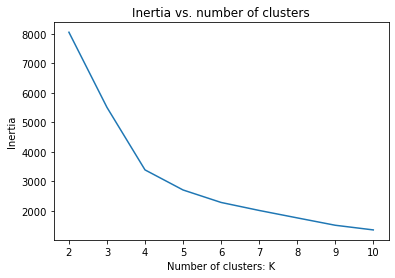

In [23]:
plt.plot(range(2,11), inertia_scores)
plt.title("Inertia vs. number of clusters")
plt.xlabel("Number of clusters: K")
plt.ylabel('Inertia')
plt.show()

get three sub-clusters from everything_else

In [24]:
cluster_cols = ['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled' ]


model = KMeans(n_clusters=3, random_state=42)

model.fit(everything_else[cluster_cols])

everything_else['sub_cluster'] = model.predict(everything_else[cluster_cols])

C:\Users\dgarb\AppData\Local\Temp/ipykernel_7920/2650404986.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  everything_else['sub_cluster'] = model.predict(everything_else[cluster_cols])


In [25]:
everything_else.head()

,Category,New_Category_Name,Item_Number,Item_Description,Bottle_Volume,Bottle_Retail,Bottles_Sold,cluster_name,revenue,Num_Stores_Selling,Bottle_Volume_scaled,Bottle_Retail_scaled,Bottles_Sold_scaled,sub_cluster
1,1012200,Scotch,10006,Scoresby Rare Scotch,750,7.70,4619,Everything_Else,35566.30,197,0.29480,-0.889638,0.031890,0
2,1701100,Temporary & Specialty Packages,100077,Kraken Rum w/ Tiki Glass,750,15.68,2679,Everything_Else,42006.72,136,0.29480,-0.512617,-0.144415,0
4,1012200,Scotch,10009,Scoresby Rare Scotch,1000,10.11,1722,Everything_Else,17409.42,70,1.32708,-0.775776,-0.231386,0
5,1701100,Temporary & Specialty Packages,100148,Jack Daniels Single Barrel w/Snifter Glass,750,41.39,606,Everything_Else,25082.34,120,0.29480,0.702069,-0.332806,0
6,1701100,Temporary & Specialty Packages,100202,Baileys Original Irish Cream w/2 Dessert Bowls,750,24.74,3160,Everything_Else,78178.40,149,0.29480,-0.084571,-0.100702,0


In [26]:
everything_else['Bottle_Volume_liters'] = everything_else['Bottle_Volume']/1000

C:\Users\dgarb\AppData\Local\Temp/ipykernel_7920/2100188245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  everything_else['Bottle_Volume_liters'] = everything_else['Bottle_Volume']/1000


# create price per milliliter

In [27]:
# price/volume
everything_else['price_per_ml'] = everything_else['Bottle_Retail'] / everything_else['Bottle_Volume']

C:\Users\dgarb\AppData\Local\Temp/ipykernel_7920/1856010719.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  everything_else['price_per_ml'] = everything_else['Bottle_Retail'] / everything_else['Bottle_Volume']


In [28]:
everything_else.groupby(['sub_cluster']).agg({'Bottle_Volume_liters' : 'mean', 'price_per_ml':'mean', 'Bottle_Retail':'mean','Bottles_Sold':'mean' })

,Bottle_Volume_liters,price_per_ml,Bottle_Retail,Bottles_Sold
sub_cluster,,,,
0,0.775065,0.038797,29.031637,2101.876669
1,0.641225,0.034183,12.918742,50759.973510
2,0.169513,0.251106,16.590308,3917.082051


In [29]:
everything_else.groupby(['sub_cluster']).agg({'Item_Number':['nunique'],'Bottle_Volume' :['min','max','std', 'median', 'mean'], 'price_per_ml':['min','max','std', 'median', 'mean'], 'Bottle_Retail':['min','max','std', 'median', 'mean'],'Bottles_Sold':['min','max','std', 'median', 'mean'] })

Item_Number Bottle_Volume                                       \
                nunique           min   max         std median        mean   
sub_cluster                                                                  
0                  3146           200  1200   79.991943  750.0  775.064526   
1                   151            50  1000  313.384730  750.0  641.225166   
2                   585            20   400  141.741469   50.0  169.512821   

            price_per_ml                            ... Bottle_Retail          \
                     min     max       std  median  ...           min     max   
sub_cluster                                         ...                         
0                0.00320  0.6462  0.035424  0.0300  ...          3.20  129.24   
1                0.00320  0.7740  0.077078  0.0180  ...          1.43   40.47   
2                0.00688  2.4336  0.420653  0.1275  ...          0.99  121.68   

                                         Bottles_Sold                       \
                   std median       mean          min    max           std   
sub_cluster                                                                  
0            20.962398  23.25  29.031637            1  26065   3991.855875   
1             8.740369  11.52  12.918742        26450  97514  19597.861508   
2            20.281583   9.26  16.590308            1  32385   6009.398898   

                                    
              median          mean  
sub_cluster                         
0              294.5   2101.876669  
1            44522.0  50759.973510  
2             1110.0   3917.082051  

[3 rows x 21 columns]

In [30]:
from freq_pd import proc_freq

In [31]:
proc_freq(everything_else,'sub_cluster')

,sub_cluster,Frequency,Percent,Cumulative_Frequency,Cumulative_Percent
0,0,3146,81.04,3146,81.04
1,1,151,3.89,3297,84.93
2,2,585,15.07,3882,100.00


In [32]:
everything_else['str_volume'] = str(everything_else.Bottle_Volume)

C:\Users\dgarb\AppData\Local\Temp/ipykernel_7920/1745242950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  everything_else['str_volume'] = str(everything_else.Bottle_Volume)


In [33]:
stop
# proc_freq(everything_else,'sub_cluster')

NameError: name 'stop' is not defined

In [34]:
df = everything_else.groupby(['sub_cluster']).agg({'revenue':'sum'})
df.style.format("{:.0f}")


,revenue
sub_cluster,
0,118837498
1,98467531
2,21414240


In [ ]:
everything_else.groupby(['sub_cluster']).agg({'Bottle_Volume':'nunique'})

In [ ]:


everything_else.groupby(['sub_cluster']).agg({'revenue':['sum'],'Bottle_Volume':['count','min','max','std', 'median', 'mean'],'Bottle_Retail':['min','max','std', 'median', 'mean'], 'price_per_ml':['min','max','std', 'median', 'mean'],'Bottles_Sold':['min','max','std', 'median', 'mean'] })

In [ ]:
everything_else.groupby(['sub_cluster']).agg({'Num_Stores_Selling':['min','max','std', 'median', 'mean']})

In [ ]:
pd.set_option('display.max_columns', None)
everything_else.groupby(['sub_cluster']).agg({'Item_Number':['nunique'],'revenue':['sum'],'Bottle_Volume':['min','max','std','median'],'price_per_ml':['min','max','std', 'median', 'mean'],'Bottles_Sold':['min','max','std', 'median', 'mean'],'Num_Stores_Selling':['min','max','std', 'median', 'mean'] })

In [ ]:
everything_else['str_volume'] = [str(prod) for prod in everything_else.Bottle_Volume ]
# [str(prod) for prod in everything_else.Bottle_Volume ]

# Name sub-clusters

In [ ]:
sub_clust_dict = {0:'most_variety', 1:'moderately_high', 2:'quick_shots', 3:'cheap'}
# everything_else['sub_cluster'].map(sub_clust_dict)
everything_else['sub_cluster_name'] = everything_else['sub_cluster'].map(sub_clust_dict)

In [ ]:
# df_categ = everything_else.groupby(['sub_cluster','New_Category_Name']).agg({'price_per_ml':['min','max','std', 'median', 'mean']}).reset_index()

In [ ]:
# df_categ.loc[df_categ.sub_cluster==2,:]

In [ ]:
moderately_high = everything_else.loc[everything_else['sub_cluster_name']== 'moderately_high',['Item_Number', 'Item_Description','revenue','Bottle_Retail','Bottle_Volume','Bottles_Sold']]

In [ ]:
moderately_high

In [ ]:
mask1 = moderately_high.Bottle_Volume < 750
moderately_high[mask1]

In [ ]:
moderately_high[mask1].shape

In [ ]:
mask2 = moderately_high.Bottle_Volume > 750
moderately_high[mask2]

In [ ]:
sub_most_variety = everything_else.loc[everything_else.sub_cluster_name== 'most_variety']
proc_freq(sub_most_variety,'str_volume')
sub_most_variety.str_volume.value_counts()

In [ ]:
sub_moderately_high = everything_else.loc[everything_else.sub_cluster_name =='moderately_high']
proc_freq(sub_moderately_high,'str_volume')
sub_moderately_high.str_volume.value_counts()

In [ ]:
sub_quick_shots = everything_else.loc[everything_else.sub_cluster_name=='quick_shots']
proc_freq(sub_quick_shots,'str_volume')
sub_quick_shots.str_volume.value_counts()

In [ ]:
sub_cheap = everything_else.loc[everything_else.sub_cluster_name== 'cheap']
proc_freq(sub_cheap,'str_volume')
sub_cheap.str_volume.value_counts()

In [ ]:
everything_else.info()

In [ ]:
everything_else2 = everything_else.copy()

In [ ]:
sub_clust_dict = {0:'most_variety', 1:'moderately_high', 2:'quick_shots', 3:'cheap'}
everything_else2['cluster_name'] = everything_else2[['sub_cluster']].apply(lambda p: sub_clust_dict[p[0]],axis=1)

In [ ]:
everything_else2['cluster_name'].head()

In [ ]:
keeps = ['Item_Number','Item_Description','Bottle_Volume','Bottle_Retail', 'Bottles_Sold', 'cluster_name',
         'revenue', 'Num_Stores_Selling', 'New_Category_Name']


everything_else_keep = everything_else2[keeps]
everything_else_keep.info()

In [ ]:
prod_clusters.info()

In [ ]:
other_original_clusters = prod_clusters.loc[prod_clusters['cluster_name'] != 'Everything_Else',:]

In [ ]:
everything_else_keep.shape

In [ ]:
other_original_clusters.shape

In [ ]:
prod_clusters.shape

In [ ]:
3865 + 603

In [ ]:
final_clusters = pd.concat([everything_else_keep,other_original_clusters], axis=0)

In [ ]:
final_clusters.info()

In [ ]:
final_clusters.groupby(['cluster_name']).agg({'Num_Stores_Selling':'nunique'})

In [ ]:
final_clusters.to_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\final_clusters.csv')